# Introduction

 In this analysis, we delve into a comprehensive exploration of a supermarket sales dataset obtained from Kaggle. The dataset contains a wealth of information regarding sales transactions, customer demographics, product lines, and payment methods, encompassing a total of 1000 entries and 17 columns. Our aim is to gain actionable insights and identify key trends that can inform strategic business decisions for the supermarket.

By conducting thorough data analysis, we aim to uncover patterns in customer behavior, understand the performance of different product lines, assess the effectiveness of various payment methods, and explore the impact of customer membership status on sales. Additionally, we will investigate factors such as sales distribution across different cities, peak transaction hours, and gross income to provide a comprehensive overview of the supermarket's operations.

Through this analysis, we seek to provide valuable insights that can guide marketing strategies, enhance operational efficiency, optimize inventory management, and ultimately contribute to the supermarket's success in a competitive market landscape.

Let's dive into the data and uncover actionable insights to drive business growth and profitability.

In [ ]:
# import required library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset from local file

In [4]:
data = pd.read_csv('supermarket_sales.csv')

In [ ]:
# checking data type

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
# checking first 5 rows

In [8]:
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
# checking missing values

In [10]:
print("Check missing values : \n")
print(data.isnull().sum())

Check missing values : 

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


Taking into consideartion that there are no missing values, we can move on to next step

In [11]:
# checking outliers

In [12]:
print("Check Outliers")
print(data.describe())

Check Outliers
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00  

In [13]:
# finding average customer rating

In [14]:
print("Average customer rating: ", data['Rating'].mean())

Average customer rating:  6.9727


In [15]:
# finding gender counts

In [16]:
print("Gender counts:")
gender_counts = data['Gender'].value_counts()
print(gender_counts)

Gender counts:
Female    501
Male      499
Name: Gender, dtype: int64


In [17]:
# plotting the bar chart for gender disrtibution in the dataset

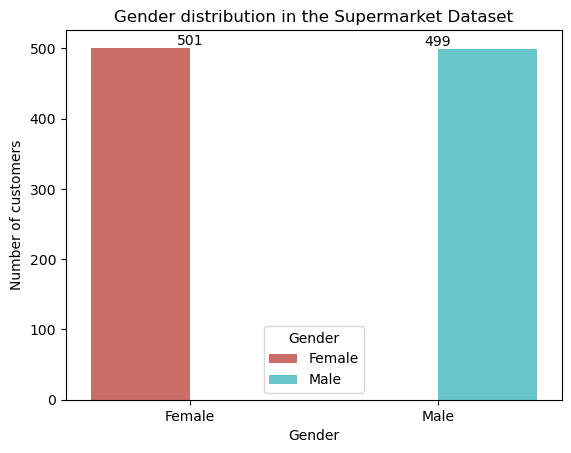

In [18]:
sns.countplot(x='Gender', data=data, palette='hls', hue='Gender')
plt.title('Gender distribution in the Supermarket Dataset')
plt.xlabel('Gender')
plt.ylabel('Number of customers')
for index, value in enumerate(gender_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

We observe that there are more female than male customers in the dataset, but not much different between them. We can move on to the next step.

In [19]:
# Start determining customer distribution by cities in dataset. Also plotting that in piechart

City counts:  Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


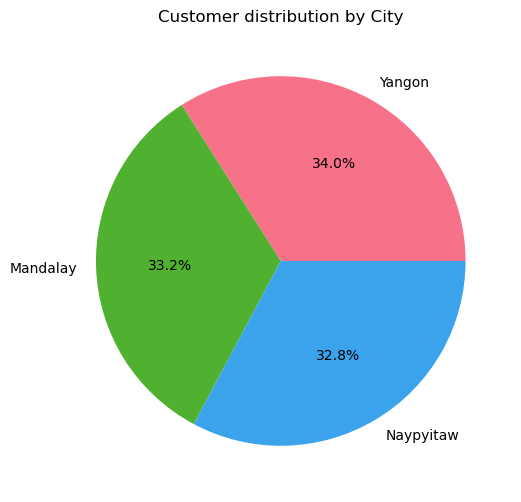

In [20]:
city_counts = data['City'].value_counts()
print("City counts: ", city_counts)

palette = sns.color_palette("husl", len(city_counts))
plt.figure(figsize=(8, 6), dpi=100)
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', colors=palette)
plt.title('Customer distribution by City')
plt.show()

In [21]:
# Analyzing total sales by city, and plotting them in bar chart

Total sales by city:  City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


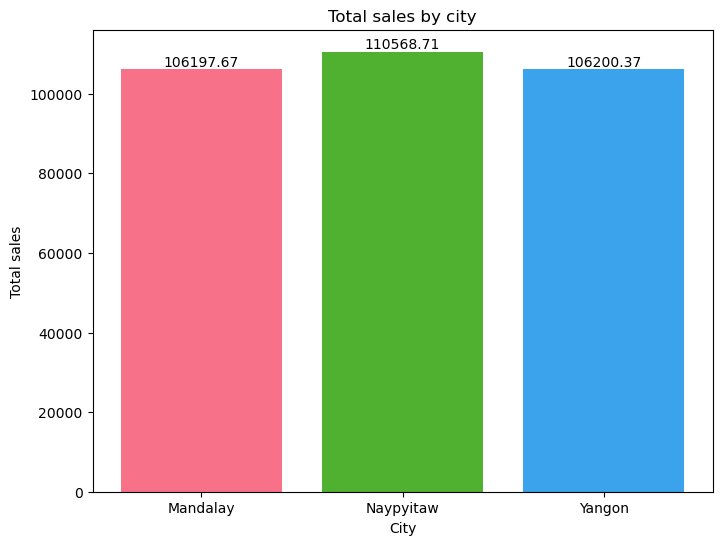

In [22]:
city_sales = data.groupby('City')['Total'].sum()
print("Total sales by city: ", city_sales)

plt.figure(figsize=(8, 6), dpi=100)
plt.bar(city_sales.index, city_sales.values, color=palette)
plt.title('Total sales by city')
plt.xlabel('City')
plt.ylabel('Total sales')

for index, value in enumerate(city_sales):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()

Relation between sales and product category!
Determining product category distribution in dataset

Product line counts:  Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


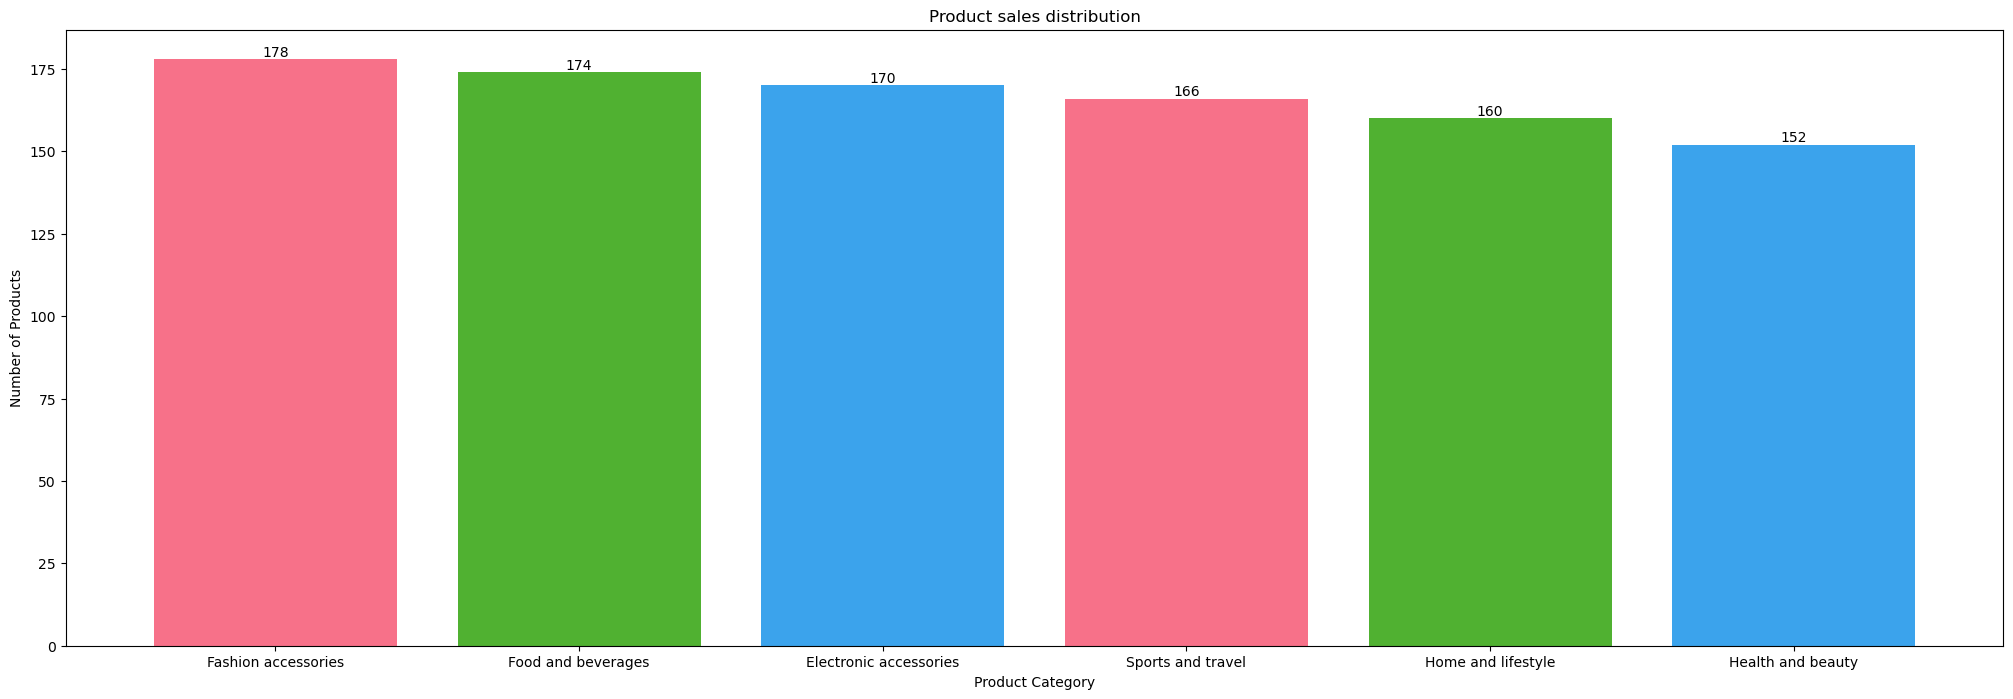

In [23]:
# product line count
product_line_counts = data['Product line'].value_counts()
print("Product line counts: ", product_line_counts)

# product sales distribution
plt.figure(figsize=(25, 8), dpi=100)
plt.bar(product_line_counts.index, product_line_counts.values, color=palette)
plt.title('Product sales distribution')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
for index, value in enumerate(product_line_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Due to the biggest sales in the "Fashion Accessories" categories, we start analyzing the relation between gender and product category.

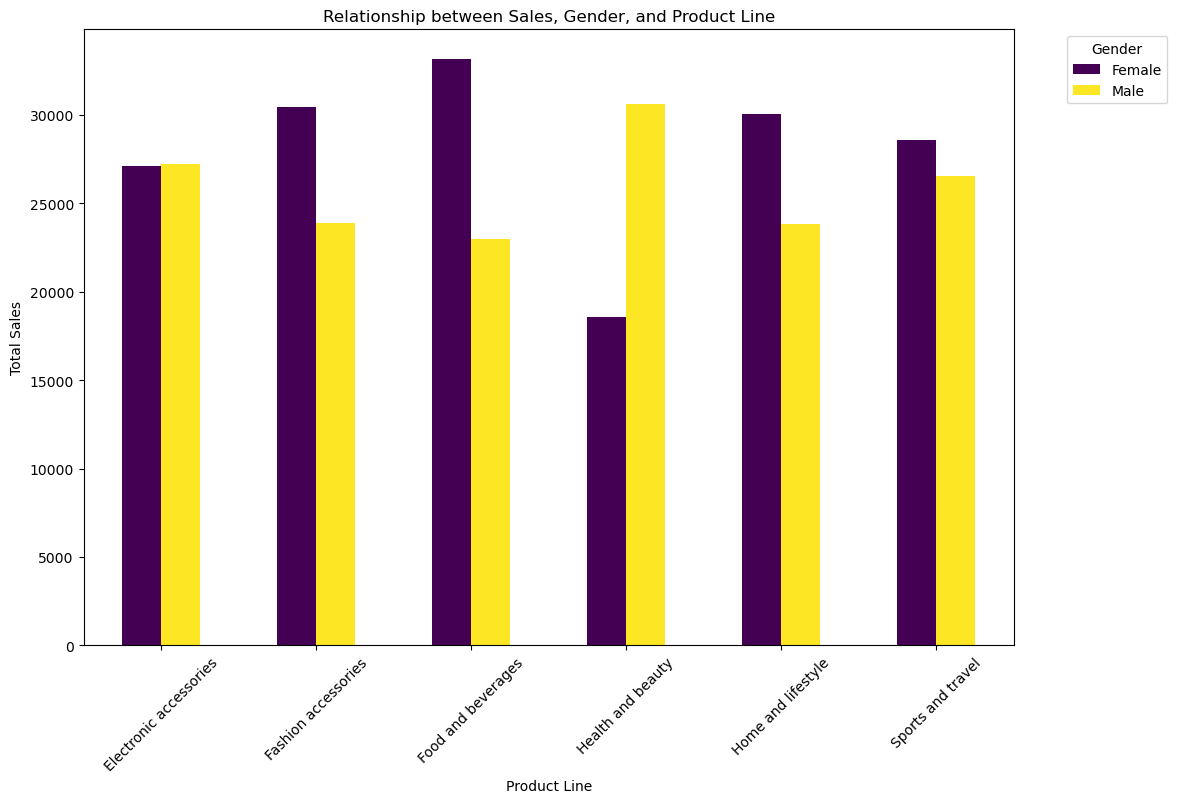

In [24]:
# Group data by Product line and Gender and sum up Total sales
product_line_gender_sales = data.groupby(['Product line', 'Gender'])['Total'].sum().unstack()

# Plot the relationship between sales, gender, and product line
plt.figure(figsize=(12, 8))
product_line_gender_sales.plot(kind='bar', stacked=False, colormap='viridis', ax=plt.gca())
plt.title('Relationship between Sales, Gender, and Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We can see than male customers have higher sales than female customers in the "Health and beauty" category. In rest of category's female customers have higher sales than male customers. Minimal difference between male and female customers in the "Electronic accessories" category. We can move on to the next step.

In [25]:
# Determining customer profile based on membership status grouping by city

Customer type counts:  Member    501
Normal    499
Name: Customer type, dtype: int64


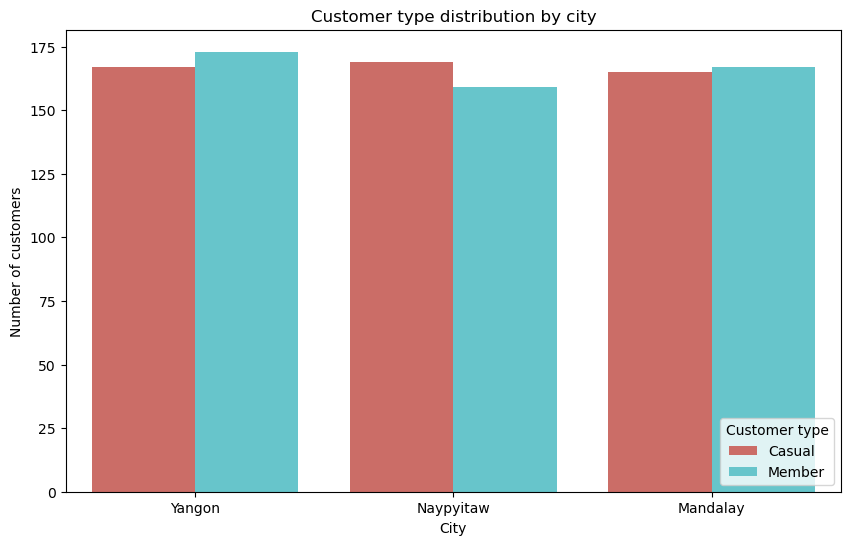

In [26]:
customer_type_counts = data['Customer type'].value_counts()
print("Customer type counts: ", customer_type_counts)

# plotting customer type distribution by city
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x='City', hue='Customer type', data=data, palette='hls')
plt.title('Customer type distribution by city')
plt.xlabel('City')
plt.ylabel('Number of customers')
plt.legend(title='Customer type', labels=['Casual', 'Member'], loc='lower right')
plt.show()

In city "Naypyitaw" there are lower member customers than casual customers. Branches in this city have more casual customers and need improve their sales of membership. We can move on to the next step.

In [27]:
# Interesting to determine the business time in market

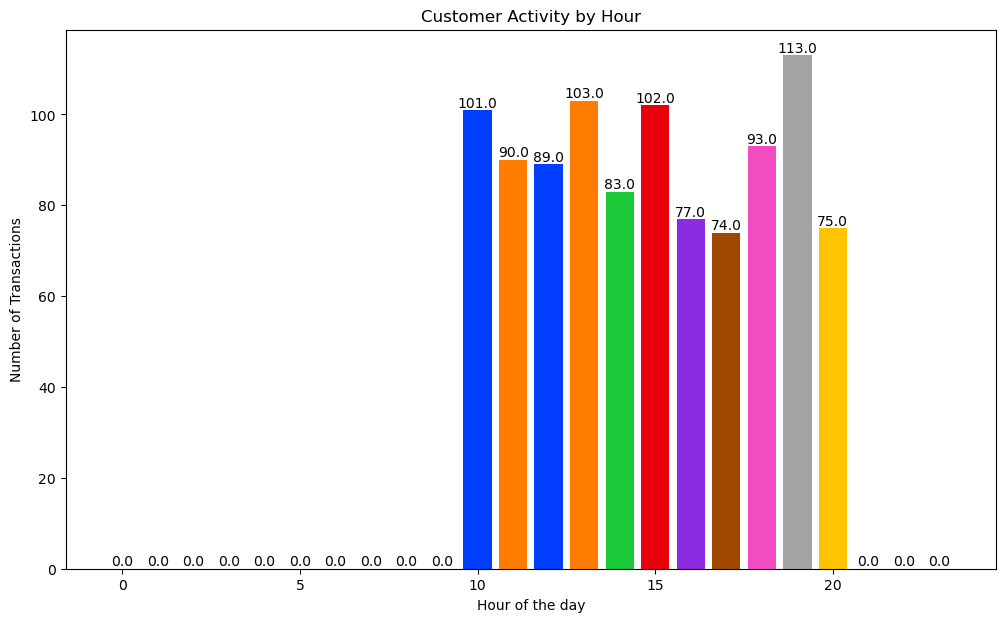

In [28]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
holidays_transactions = data.groupby('Hour').size()

all_hours = pd.RangeIndex(start=0, stop=24)
full_day_hourly_transactions = holidays_transactions.reindex(all_hours).fillna(0)
palette = sns.color_palette("bright", 12)

plt.figure(figsize=(12, 7), dpi=100)
plt.bar(full_day_hourly_transactions.index, full_day_hourly_transactions.values, color=palette)
plt.title('Customer Activity by Hour')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Transactions')
for index, value in enumerate(full_day_hourly_transactions):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Distribution of busiest time in market is irregular, due to high number of transactions in the 10, 13, 15,18,19 hours. We can move on to the next step. Highest number of transactions are in 19:00-20:00 hour. Moving on to the next step

In [29]:
# Pyment method distribution

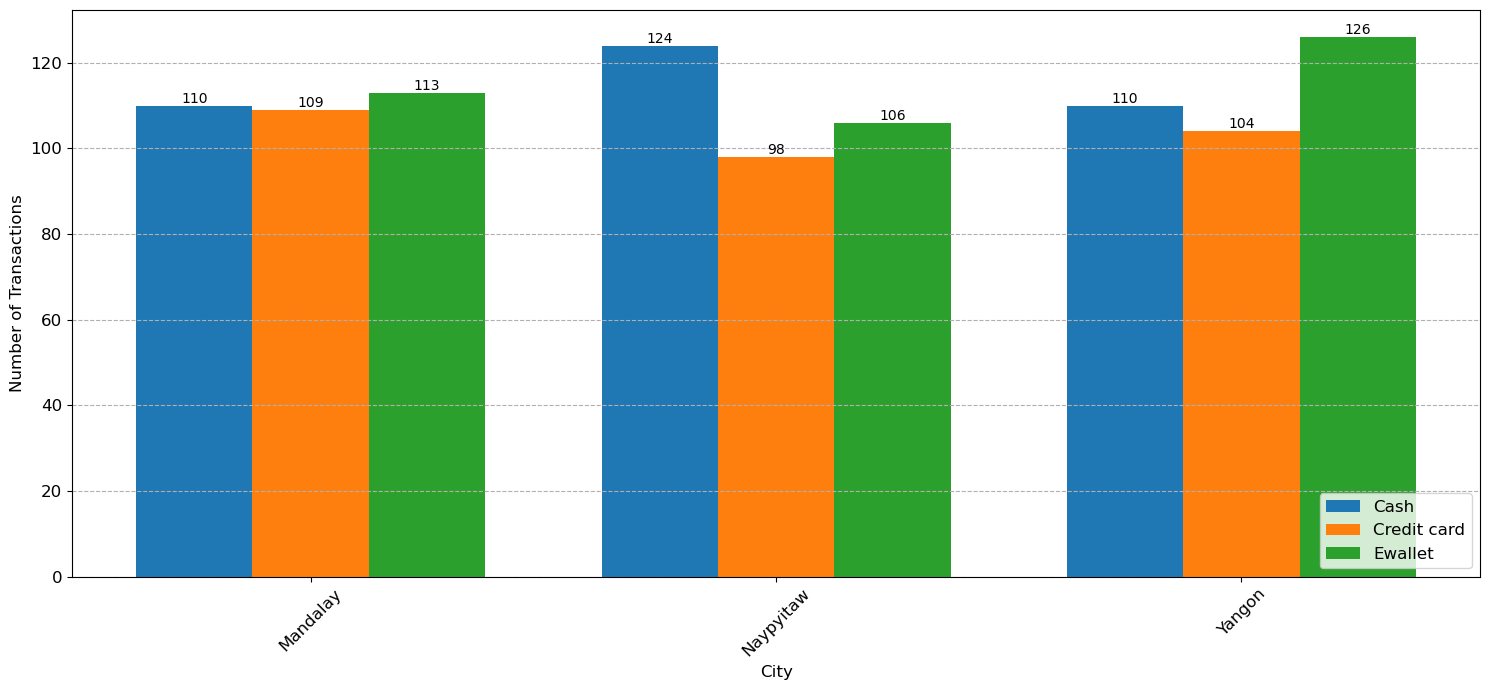

In [30]:
# Group data by City and Payment and count the number of transactions
payment_types_by_city = data.groupby(['City', 'Payment']).size().unstack(fill_value=0)

# Get the number of cities and set bar width and index for plotting
num_cities = len(payment_types_by_city.index)
bar_width = 0.25
index = np.arange(num_cities)

# Plotting the distribution of payment types by city
plt.figure(figsize=(15, 7), dpi=100)
for i, payment_method in enumerate(payment_types_by_city.columns):
    plt.bar(index + bar_width * i, payment_types_by_city[payment_method], bar_width, label=payment_method)

plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(index + bar_width, payment_types_by_city.index, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='lower right')
plt.grid(axis='y', linestyle='--')

# Add text annotations to each bar
for i, payment_method in enumerate(payment_types_by_city.columns):
    for j, value in enumerate(payment_types_by_city[payment_method]):
        plt.text(j + i * bar_width, value, str(value), ha='center', fontsize=10, verticalalignment='bottom')

plt.tight_layout()
plt.show()

Also, we can see that the number of transactions with cash in Naypyitaw is higher than other cities. We can move on to the next step for determining sales distribution by payment type group by city.

In [31]:
# Determining sales distribution by payment type group by city

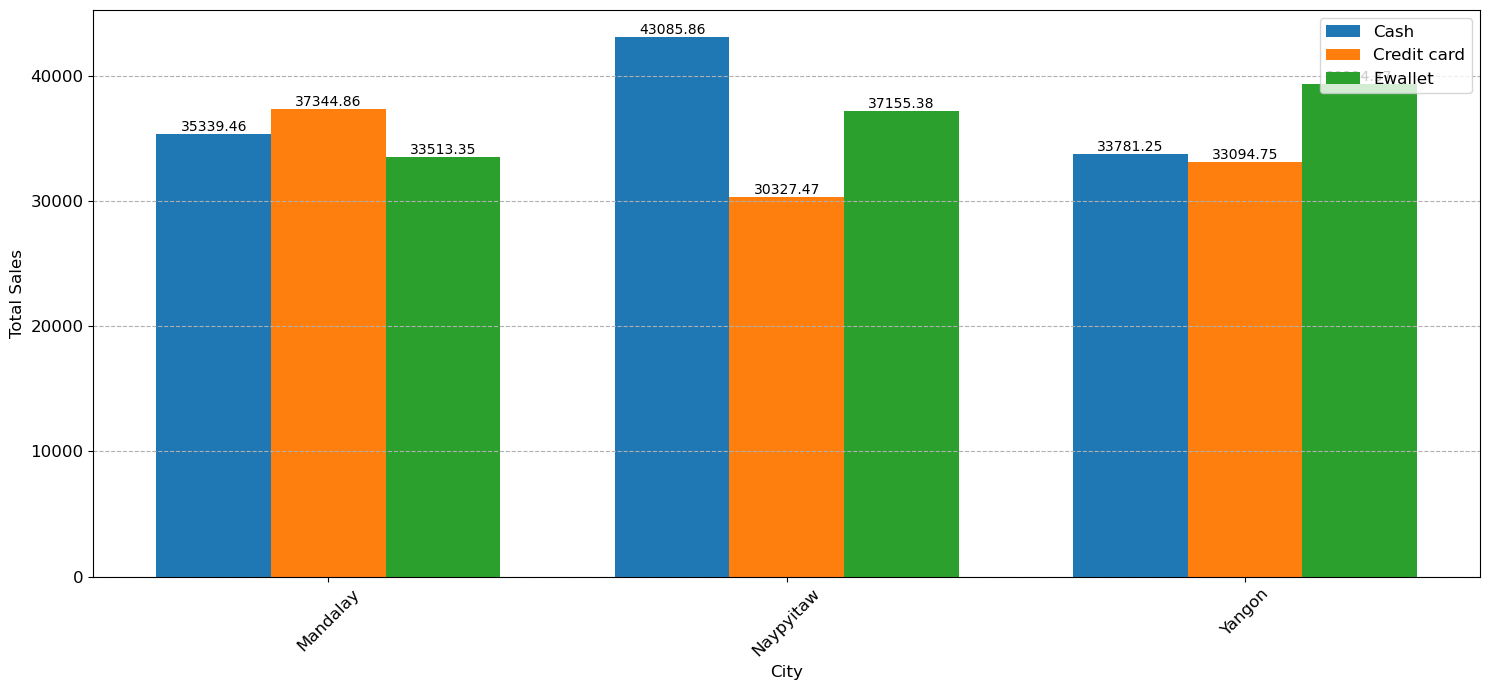

In [32]:
# Group data by City and Payment, summing up Total sales
sales_by_city_payment = data.groupby(['City', 'Payment'])['Total'].sum().unstack(fill_value=0)

# Get the number of cities and set bar width and index for plotting
num_cities = len(sales_by_city_payment.index)
bar_width = 0.25
index = np.arange(num_cities)

# Plotting the distribution of sales by payment type and city
plt.figure(figsize=(15, 7), dpi=100)
for i, payment_method in enumerate(sales_by_city_payment.columns):
    plt.bar(index + bar_width * i, sales_by_city_payment[payment_method], bar_width, label=payment_method)

plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(index + bar_width, sales_by_city_payment.index, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--')

# Add text annotations to each bar
for i, payment_method in enumerate(sales_by_city_payment.columns):
    for j, value in enumerate(sales_by_city_payment[payment_method]):
        plt.text(j + i * bar_width, value, str(round(value, 2)), ha='center', fontsize=10, verticalalignment='bottom')

plt.tight_layout()
plt.show()

In [33]:
# As next step we will determine mean payment for one transaction by city.

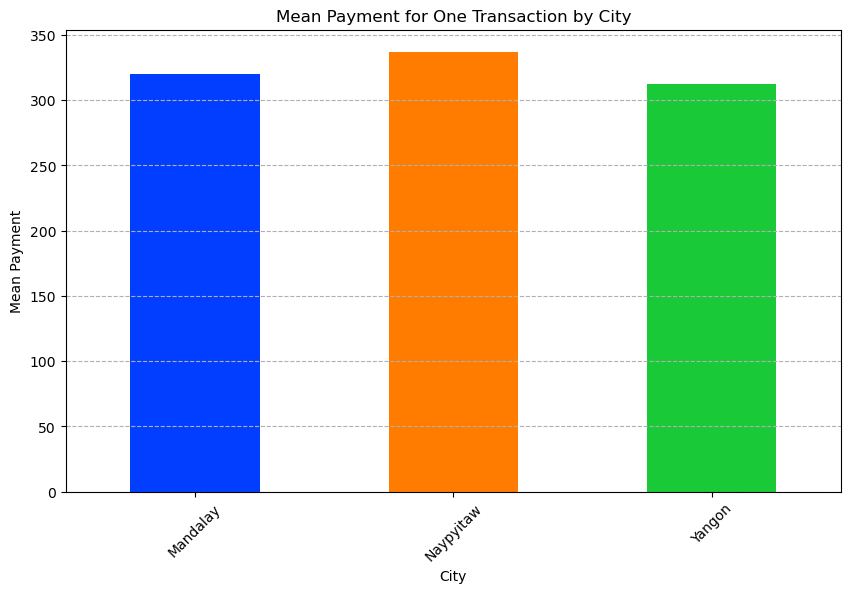

In [34]:
# Calculate the mean payment for one transaction by city
mean_payment_by_city = data.groupby('City')['Total'].mean()

# Plot the mean payment for one transaction by city
plt.figure(figsize=(10, 6))
mean_payment_by_city.plot(kind='bar', color=palette)
plt.title('Mean Payment for One Transaction by City')
plt.xlabel('City')
plt.ylabel('Mean Payment')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [35]:
# As next step we will determine city wise gross income (income before deduction).

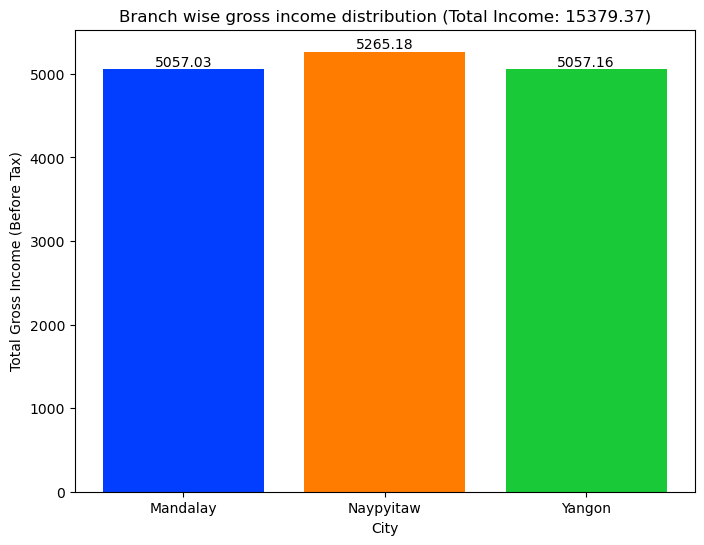

gross margin percentage analysis: 
min gross margin percentage:  4.761904762
max gross margin percentage:  4.761904762
average gross margin percentage:  4.761904762


In [36]:
gross_income_total = data.groupby('City')['gross income'].sum()

total_gross_income = gross_income_total.sum()

plt.figure(figsize=(8, 6), dpi=100)
bars = plt.bar(gross_income_total.index, gross_income_total.values, color=palette)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.title('Branch wise gross income distribution (Total Income:' + f' {total_gross_income:.2f})')
plt.xlabel('City')
plt.ylabel('Total Gross Income (Before Tax)')
plt.xticks(rotation=0)
plt.show()


print("gross margin percentage analysis: ")
print("min gross margin percentage: ", data['gross margin percentage'].min())
print("max gross margin percentage: ", data['gross margin percentage'].max())
print("average gross margin percentage: ", data['gross margin percentage'].mean())

In [37]:
# Distribution of product line sales in every branch.

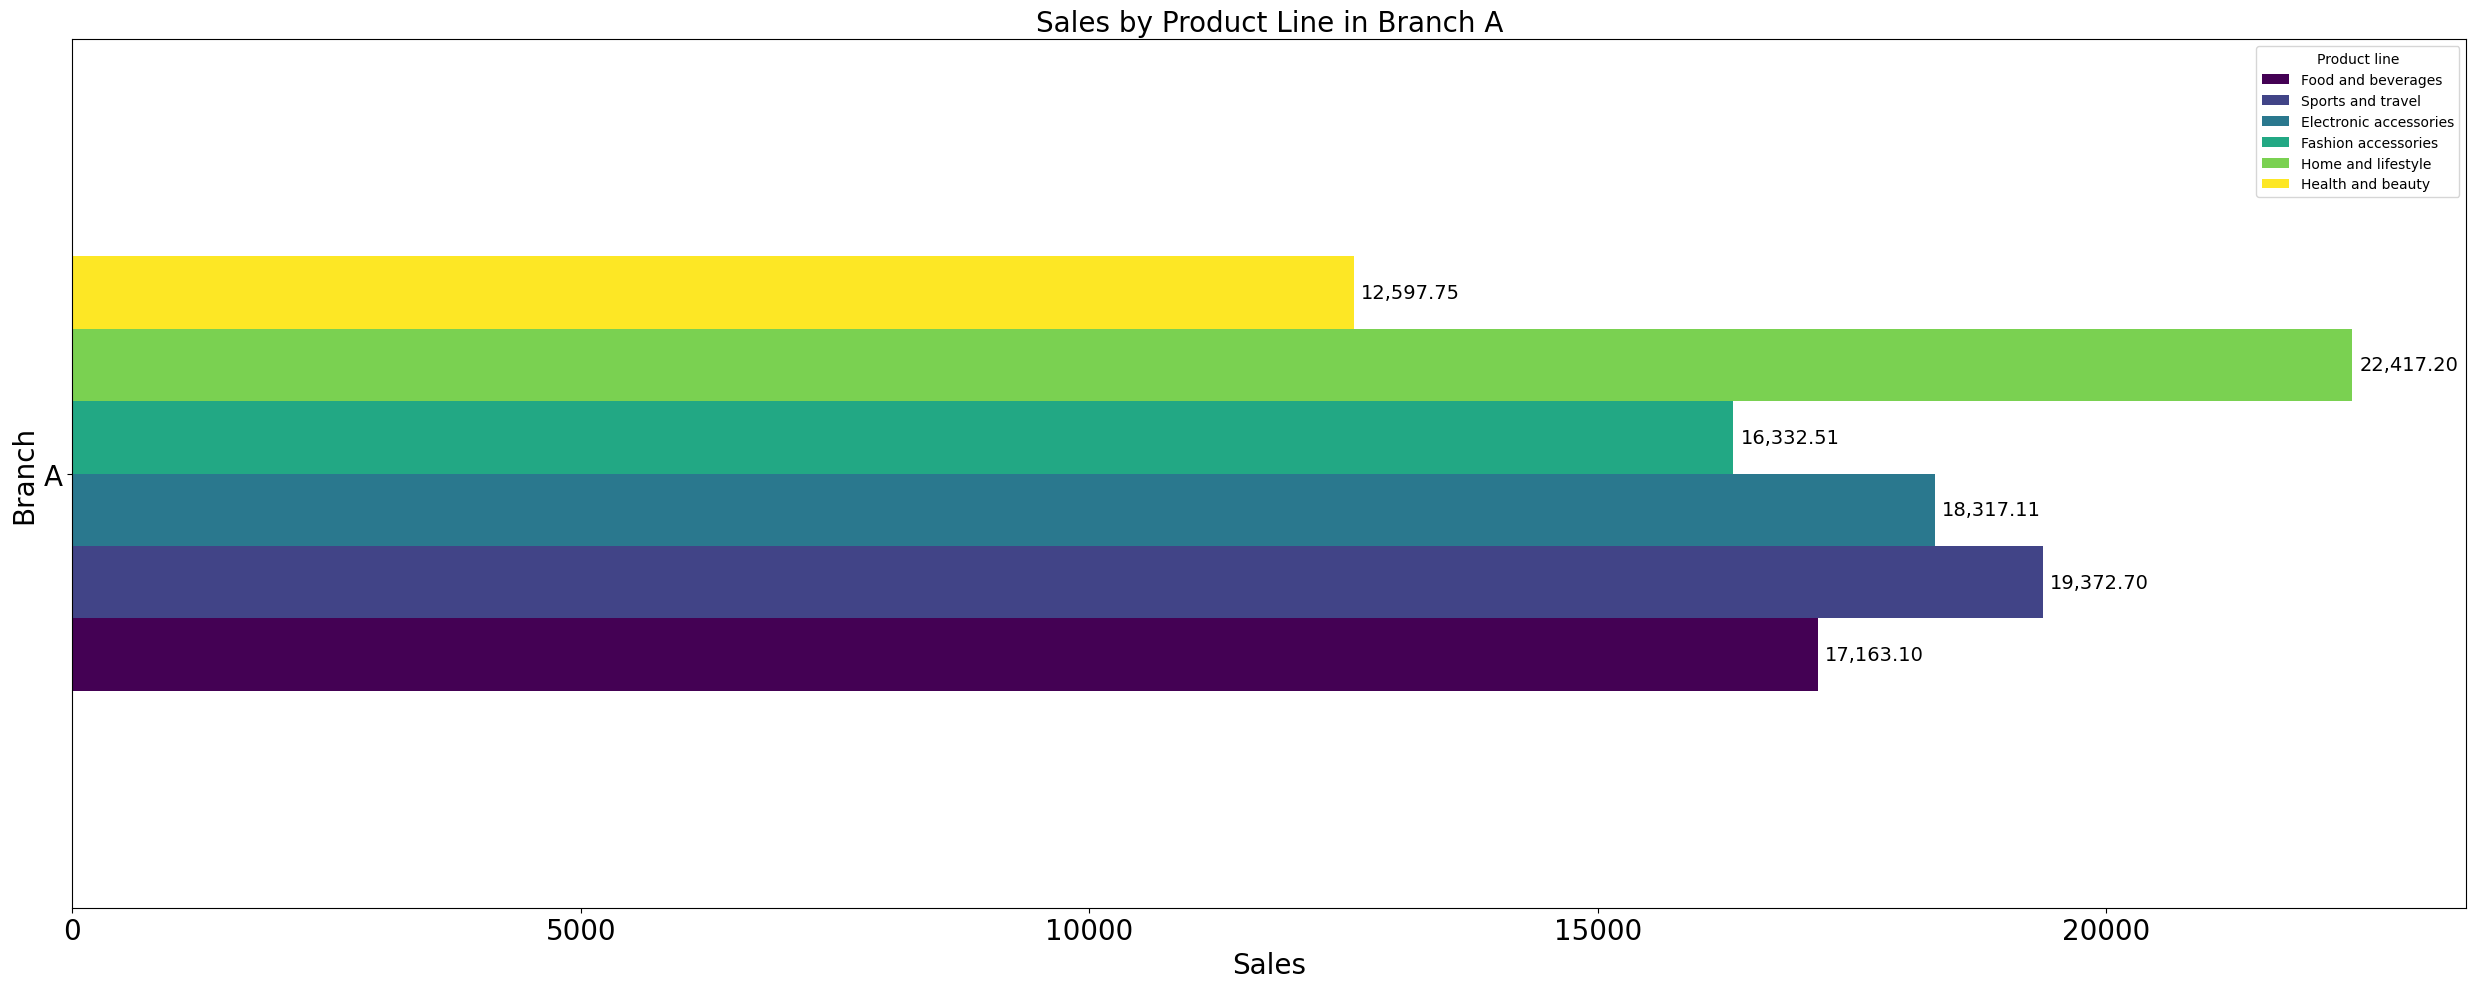

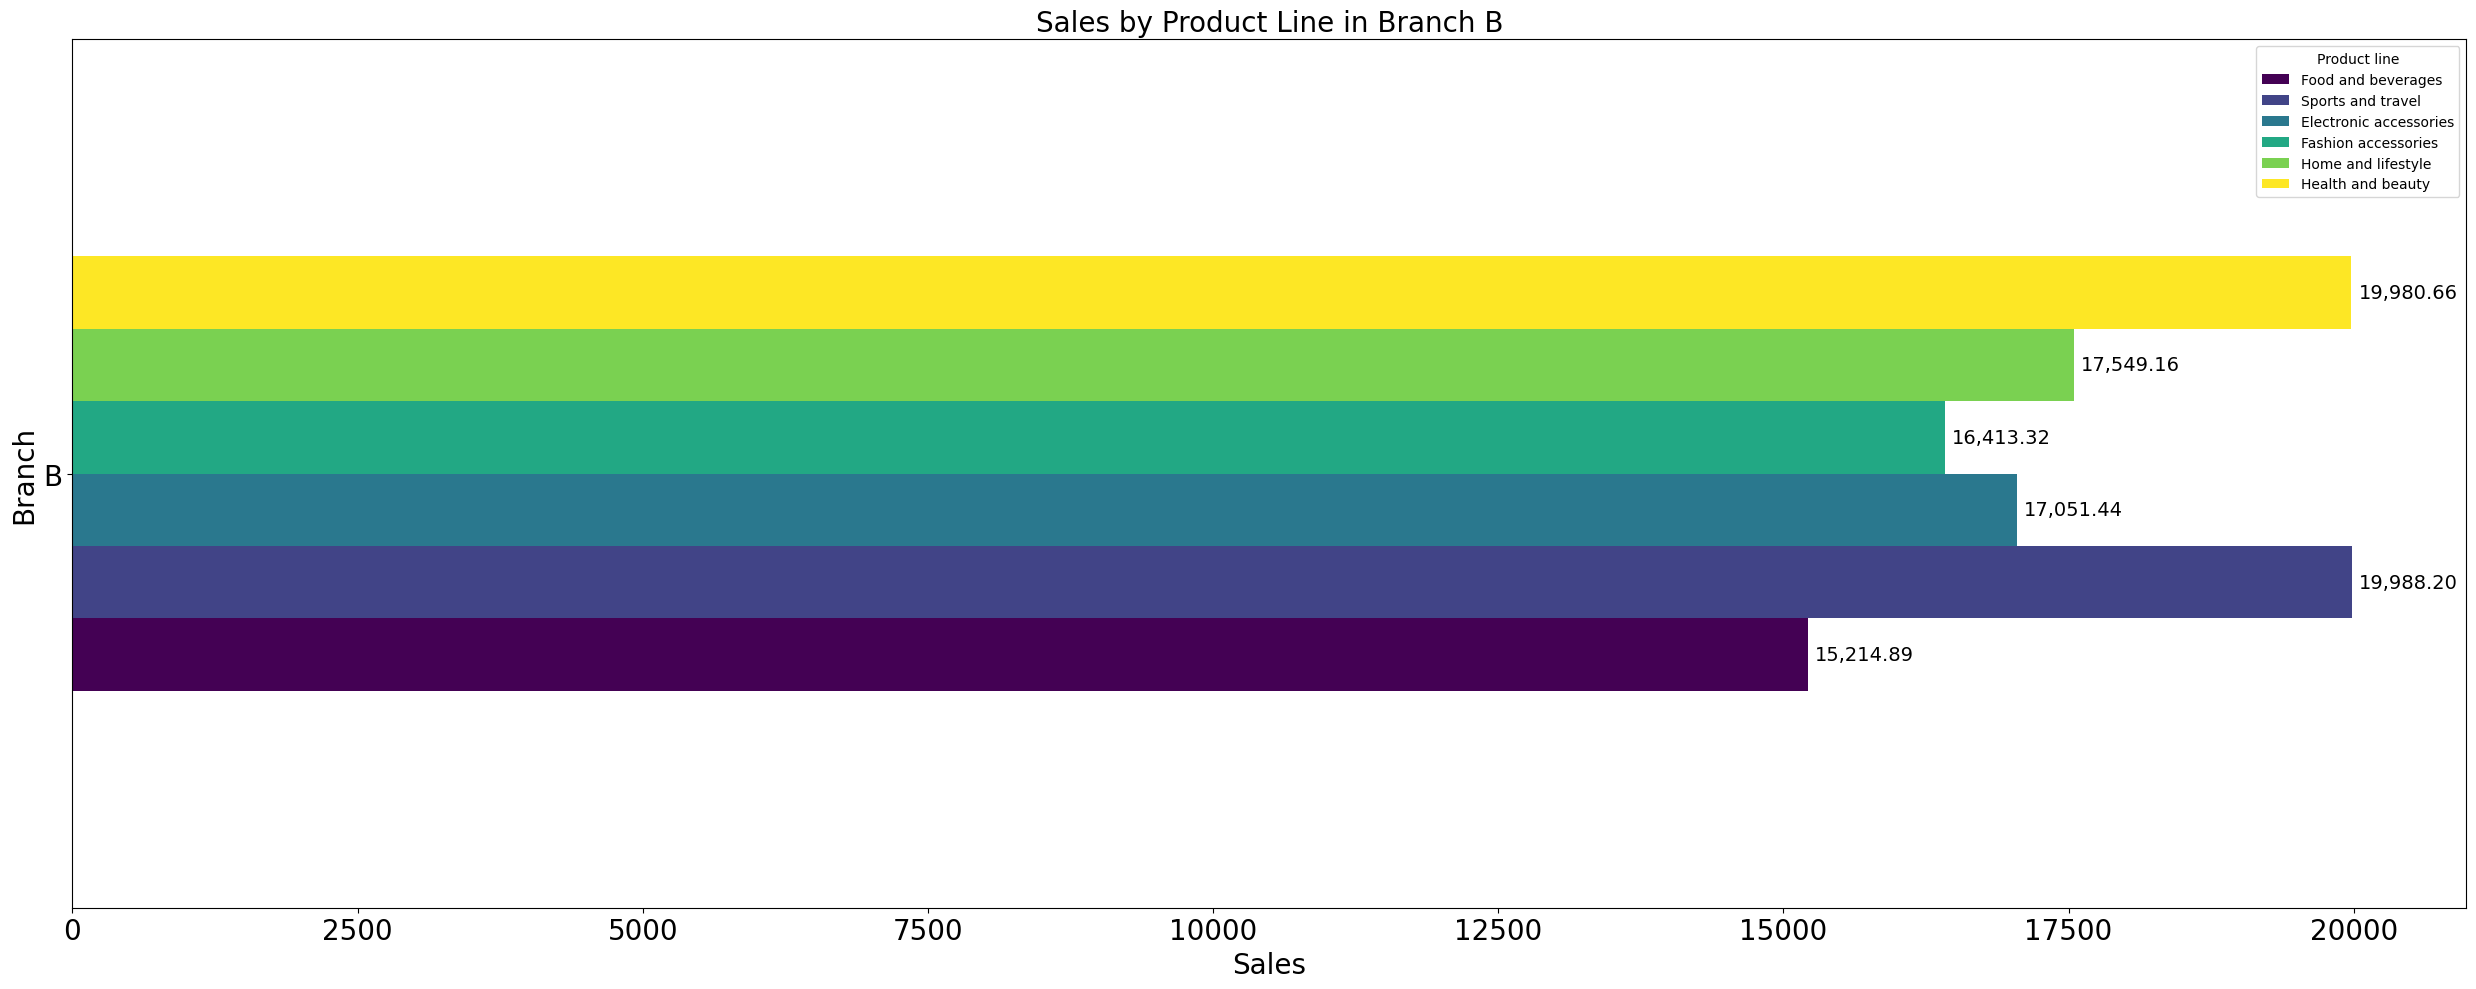

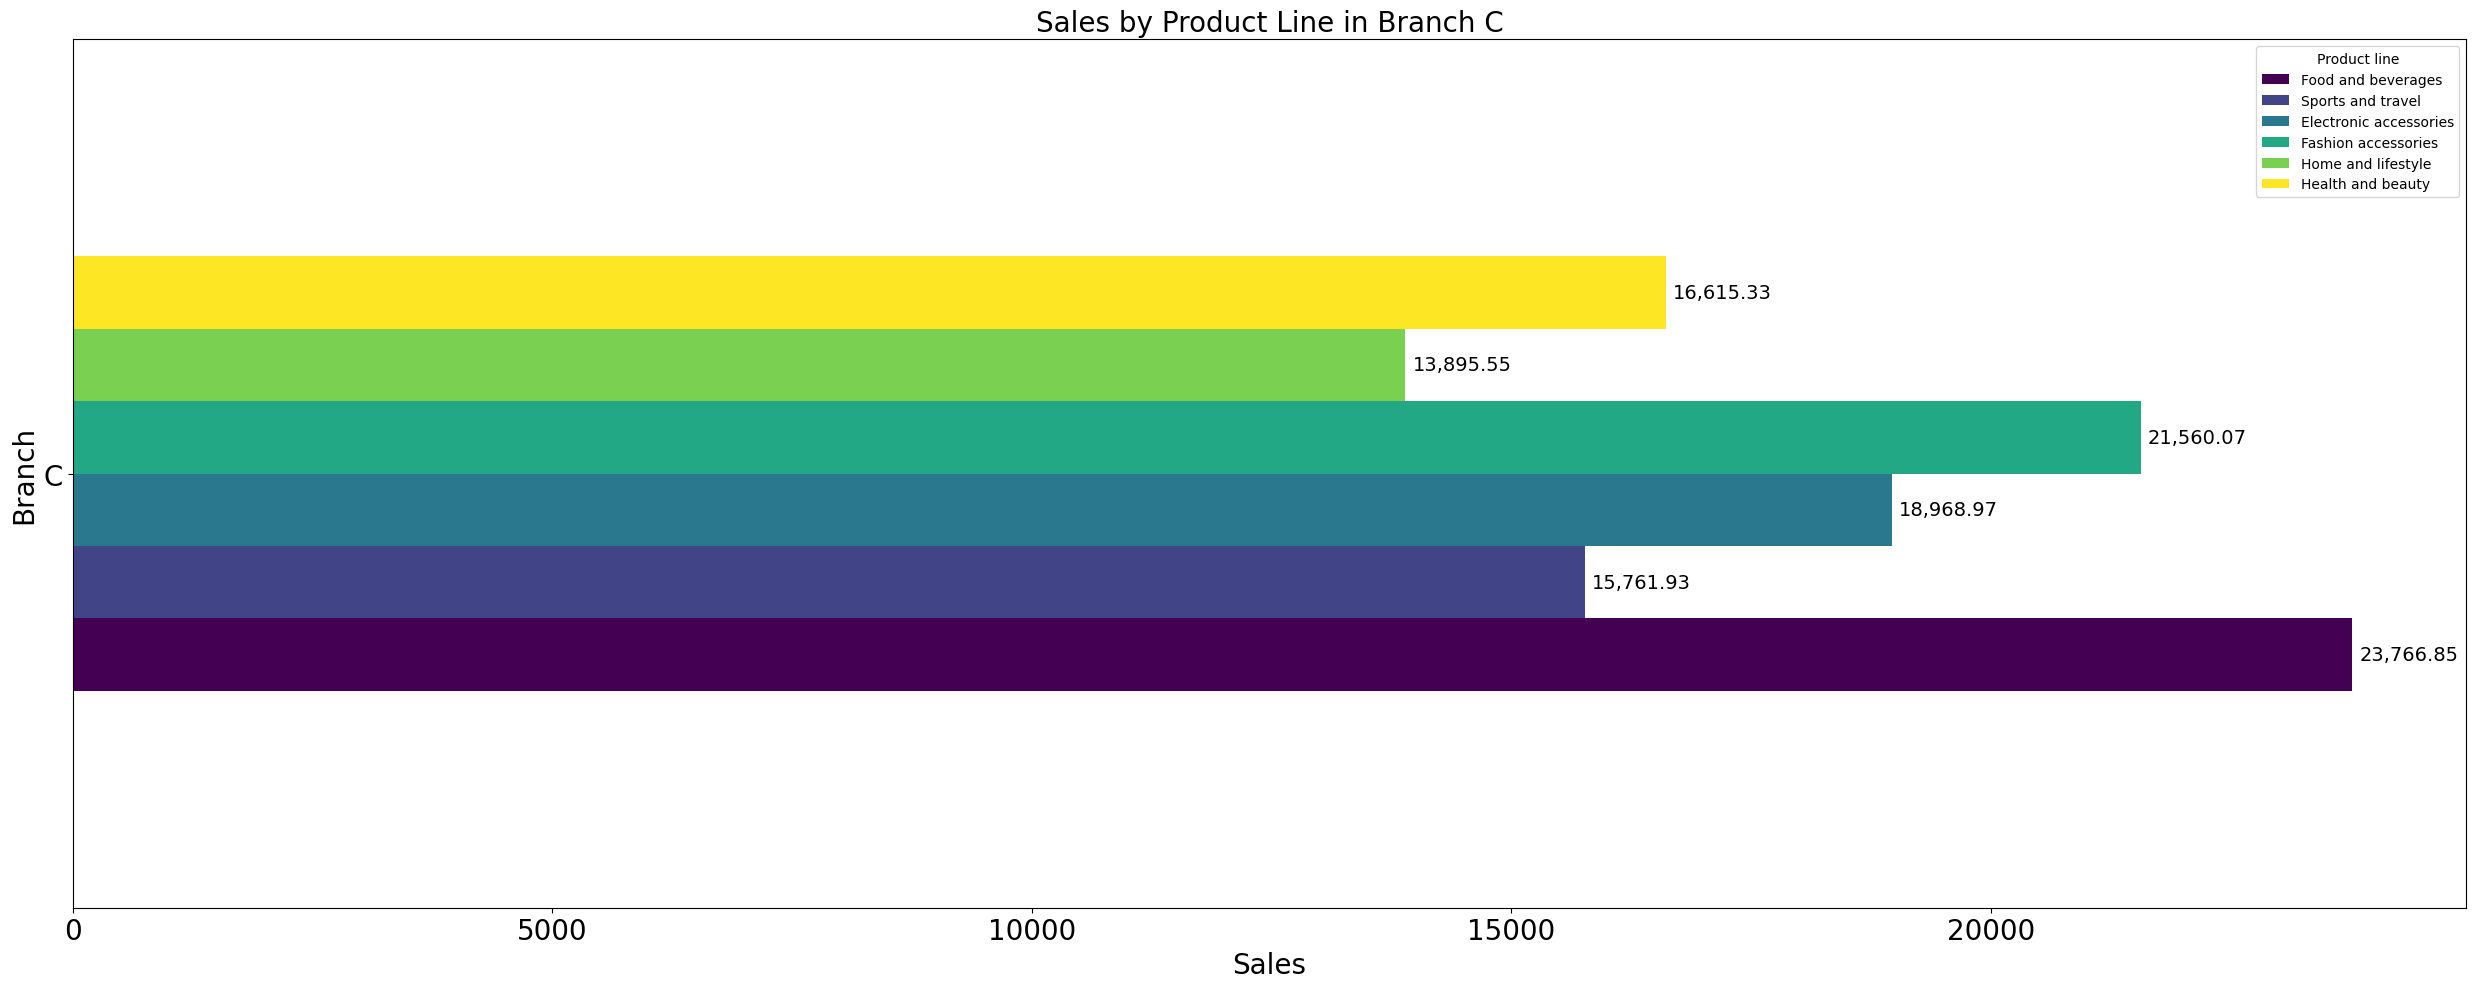

In [38]:
product_line_sales = data.groupby(['Branch', 'Product line'])['Total'].sum().unstack()
total_sales_per_product_line = product_line_sales.sum()
sorted_columns = total_sales_per_product_line.sort_values(ascending=False).index
product_line_sales_sorted = product_line_sales[sorted_columns]

# Separate plots for each branch
for branch in ['A', 'B', 'C']:
    ax = product_line_sales_sorted.loc[[branch]].plot(kind='barh', figsize=(25, 10), legend=True, colormap='viridis')
    ax.set_title(f'Sales by Product Line in Branch {branch}', fontsize=20)
    ax.set_xlabel('Sales', fontsize=20)
    ax.set_ylabel('Branch', fontsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    # Adding annotations next to each bar for better visibility
    for p in ax.patches:
        ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', fontsize=14, color='black', xytext=(5, 0), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Summary:

Conducted comprehensive data analysis on a supermarket sales dataset containing 1000 entries and 17 columns.

Verified data integrity by checking for missing values, duplicates, and outliers.

Identified key insights and trends in the dataset to inform business decisions.

Customer Gender Distribution: The dataset contains slightly more female customers (501) than male customers (499).

Customer City Distribution: Yangon has the highest customer count (340), followed closely by Mandalay (332) and Naypyitaw (328).

Total Sales by City: Naypyitaw has the highest total sales (
106,200.37) and Mandalay ($106,197.67).

Product Line Distribution: Fashion accessories is the most popular product line, followed by Food and beverages and Electronic accessories.

Relationship between Sales, Gender, and Product Line: Male customers have higher sales in Health and beauty products, while female customers dominate in other product categories.

Customer Type Distribution: The dataset consists of 501 members and 499 regular customers. Naypyitaw has more regular customers compared to members.

Busiest Time in Market: Peak transaction hours occur between 19:00 and 20:00.
Payment Method Distribution: Ewallet is the most popular payment method across all cities, followed by Cash and Credit card.

Sales Distribution by Payment Type and City: Naypyitaw has a higher number of cash transactions compared to other cities.

Mean Payment for One Transaction by City: Mandalay has the highest mean payment for one transaction ($322.97), followed by Naypyitaw and Yangon.

Gross Income Distribution: Naypyitaw has the highest gross income ($38,090.68), followed by Yangon and Mandalay.

Gross Margin Percentage: The average gross margin percentage across all transactions is approximately 4.76%.

# Recommendations:

Marketing Strategy: Develop targeted marketing campaigns based on customer demographics and preferences.

Membership Promotion: Encourage more customers, especially in Naypyitaw, to sign up for membership programs through incentives and promotions.

Operational Efficiency: Optimize staffing and inventory management during peak hours to improve customer service and satisfaction.

Payment Method Promotion: Promote the use of Ewallets and credit cards to enhance convenience and speed up transactions.